In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
def plot_mean_and_std(dfs, lambdas, col="diverted", ytitle="Media"):
    x = []
    y_mean = []
    y_std = []

    for i, df in enumerate(dfs):
        x.append(lambdas[i])
        y_mean.append(df[col].mean())
        y_std.append(df[col].std())

    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

    # --- Gráfico 1: medias con barras de error ---
    axes[0].plot(x, y_mean, linestyle="-", color="dodgerblue")
    axes[0].errorbar(x, y_mean, yerr=y_std, fmt="none", ecolor="navy", capsize=4)
    axes[0].scatter(x, y_mean, color="navy", zorder=3)
    axes[0].set_xlabel("λ")
    axes[0].set_ylabel(f"{ytitle}")

    # --- Gráfico 2: desviaciones estándar ---
    axes[1].plot(x, y_std, linestyle="-", color="darkorange")
    axes[1].scatter(x, y_std, color="saddlebrown", zorder=3)
    axes[1].set_xlabel("λ")
    axes[1].set_ylabel(f"Error de estimación para {col}")

    plt.tight_layout()
    plt.show()


In [4]:
data = {}
with open("exercise_4_results.pkl", "rb") as f:
    data = pickle.load(f)
dfs = [pd.DataFrame(data[i]["numeric_results"]) for i in range(len(data))]
lambdas = [0.02, 0.1, 0.2, 0.5, 1]
dts = [pd.DataFrame(data[i]["plane_history"]) for i in range(len(data))]

In [5]:
for i in range(len(dfs)):
    dfs[i]["reposition_prop"] = dfs[i]["reposition_count"] / dfs[i]["total_planes"]
    dfs[i]["landed_prop"] = dfs[i]["landed"] / dfs[i]["total_planes"]
    dfs[i]["diverted_prop"] = dfs[i]["diverted"] / dfs[i]["total_planes"]

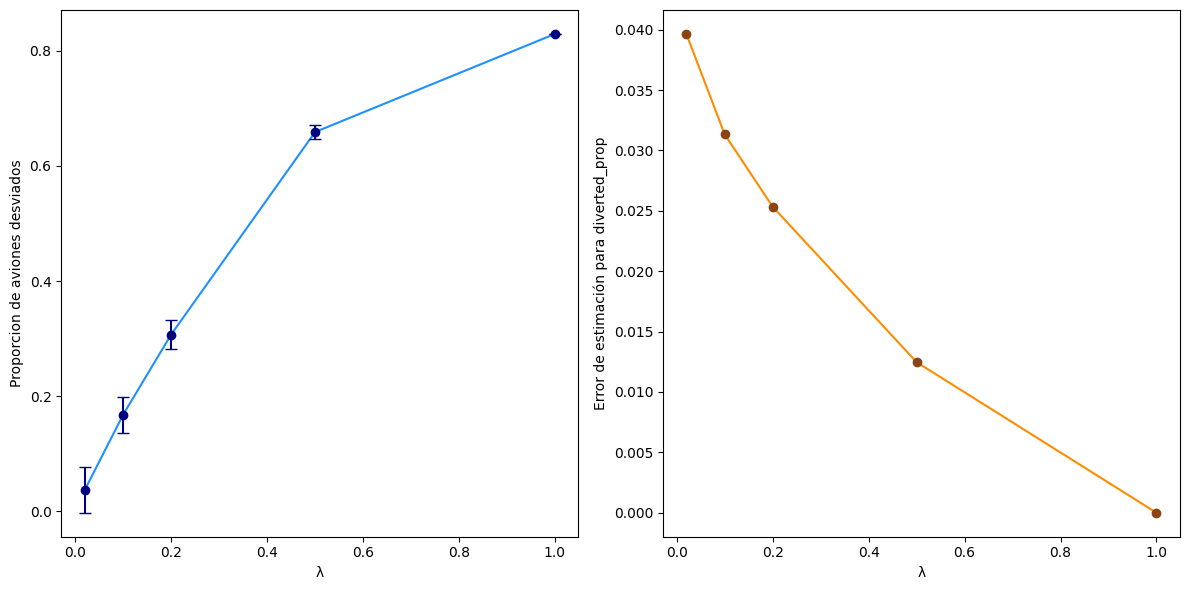

In [6]:
plot_mean_and_std(dfs, lambdas, "diverted_prop", "Proporcion de aviones desviados")

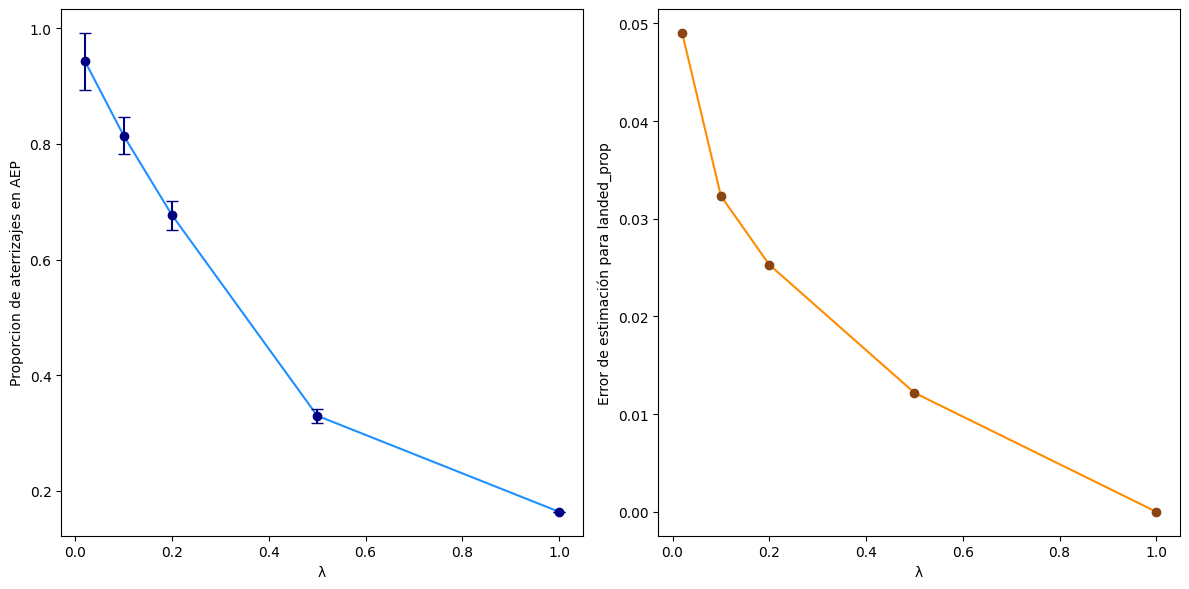

In [7]:
plot_mean_and_std(dfs, lambdas, "landed_prop", "Proporcion de aterrizajes en AEP")

In [8]:
dts[0]

,simulation_id,mean_reposition,mean_congestion,mean_flight_time,mean_diverted
0,0,0.055556,0.055556,23.000000,0.055556
1,1,0.100000,0.100000,23.000000,0.100000
2,2,0.045455,0.045455,23.000000,0.045455
3,3,0.133333,0.366667,23.068966,0.000000
4,4,0.047619,0.047619,23.000000,0.047619
...,...,...,...,...,...
9995,9995,0.130435,0.130435,23.000000,0.130435
9996,9996,0.071429,0.071429,23.000000,0.071429
9997,9997,0.227273,0.545455,23.095238,0.045455
9998,9998,0.038462,0.153846,23.000000,0.000000


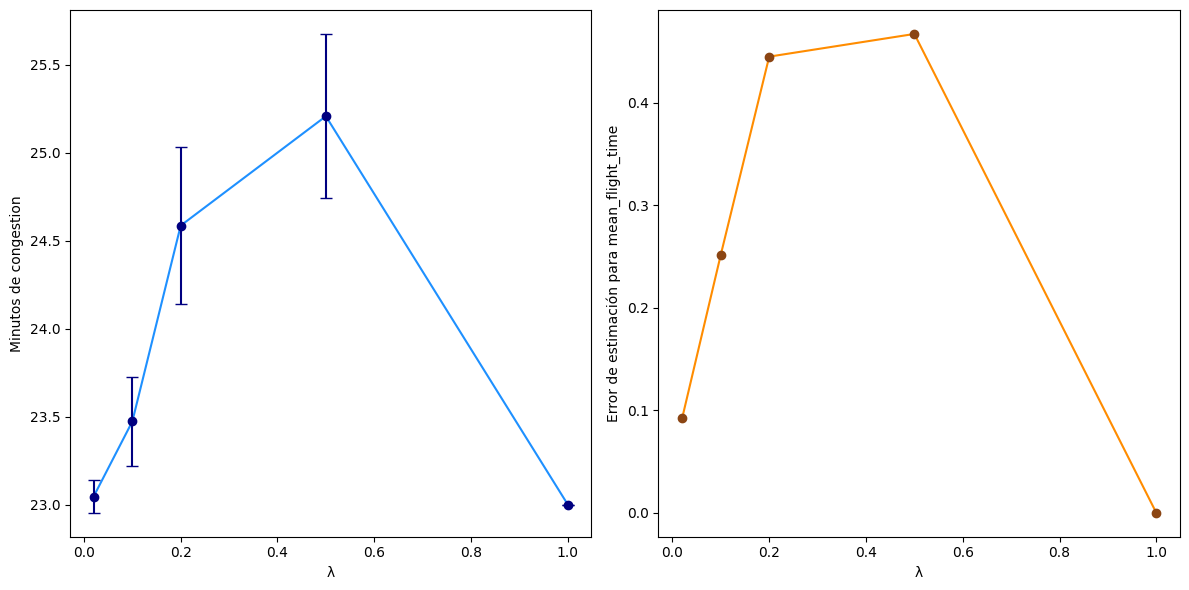

In [10]:
plot_mean_and_std(dts, lambdas, "mean_flight_time", "Minutos de congestion")